In [26]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append("../")

from utils.parse_arxiv import load_json
from compute_metrics import compute_percent_include

os.listdir("../data/arxiv/arxiv_workloads/res/")

['k100_gk20_pn50_n20.json',
 'k100_gk50_pn50_n20.json',
 'k500_gk100_pn50_n20.json',
 'k500_gk250_pn50_n20.json',
 'k1000_gk100_pn50_n20.json',
 'k1000_gk300_pn50_n20.json',
 'k1000_gk500_pn50_n20.json',
 'stats.csv',
 '.ipynb_checkpoints']

In [27]:
root = "../data/arxiv/arxiv_workloads/res/"

res_files = ['k100_gk20_pn50_n20.json',
            'k100_gk50_pn50_n20.json',
            'k500_gk100_pn50_n20.json',
            'k500_gk250_pn50_n20.json',
            'k1000_gk100_pn50_n20.json',
            'k1000_gk300_pn50_n20.json',
            'k1000_gk500_pn50_n20.json']

In [28]:
res = load_json("../data/arxiv/arxiv_workloads/res/k100_gk20_pn50_n20.json")

Loaded from ../data/arxiv/arxiv_workloads/res/k100_gk20_pn50_n20.json


In [29]:
def arxiv_one_pi(one_res, gk):
    gt = one_res['arxiv_abstract']
    vecp = one_res['arxiv_title']
    pred = one_res['weighted_hybrid']
    pi = compute_percent_include(gt, pred[:])
    gk_pi = compute_percent_include(gt, pred[-gk:])
    vec_gk_pi = compute_percent_include(gt, vecp[-gk:])
    return pi, gk_pi, vec_gk_pi

In [30]:
pi_list = []
gk_pi_list = []
for k, v in res.items():
    pi, gk_pi, _ = arxiv_one_pi(v, 20)
    pi_list.append(pi)
    gk_pi_list.append(gk_pi)

pi_list = np.array(pi_list)
gk_pi_list = np.array(gk_pi_list)

In [31]:
pi_list.mean()

0.363

In [32]:
gk_pi_list.mean()

0.014310000000000002

In [39]:
pis = []
gk_pis = []
vec_gk_pis = []

for res_file in res_files:
    res = load_json(os.path.join(root, res_file))
    pi_list = []
    gk_pi_list = []
    vec_gk_pi_list = []
    for k, v in res.items():
        gk = int(res_file.split("_")[1].split("k")[-1])
        pi, gk_pi, vec_gk_pi = arxiv_one_pi(v, gk)
        pi_list.append(pi)
        gk_pi_list.append(gk_pi)
        vec_gk_pi_list.append(vec_gk_pi)

    pi_list = np.array(pi_list)
    gk_pi_list = np.array(gk_pi_list)
    vec_gk_pi_list = np.array(vec_gk_pi_list)
    pis.append(pi_list.mean())
    gk_pis.append(gk_pi_list.mean())
    vec_gk_pis.append(vec_gk_pi_list.mean())

    print(res_file)
    print("recall:", pi_list.mean())
    print("gk re: ", gk_pi_list.mean())
    print("vec gk re: ", vec_gk_pi_list.mean())
    print()

Loaded from ../data/arxiv/arxiv_workloads/res/k100_gk20_pn50_n20.json
k100_gk20_pn50_n20.json
recall: 0.363
gk re:  0.014310000000000002
vec gk re:  0.04677000000000001

Loaded from ../data/arxiv/arxiv_workloads/res/k100_gk50_pn50_n20.json
k100_gk50_pn50_n20.json
recall: 0.29872000000000004
gk re:  0.04041
vec gk re:  0.13702

Loaded from ../data/arxiv/arxiv_workloads/res/k500_gk100_pn50_n20.json
k500_gk100_pn50_n20.json
recall: 0.46229000000000003
gk re:  0.030496
vec gk re:  0.06105600000000001

Loaded from ../data/arxiv/arxiv_workloads/res/k500_gk250_pn50_n20.json
k500_gk250_pn50_n20.json
recall: 0.3981799999999999
gk re:  0.08280200000000001
vec gk re:  0.177402

Loaded from ../data/arxiv/arxiv_workloads/res/k1000_gk100_pn50_n20.json
k1000_gk100_pn50_n20.json
recall: 0.5367139999999999
gk re:  0.019562000000000003
vec gk re:  0.033351

Loaded from ../data/arxiv/arxiv_workloads/res/k1000_gk300_pn50_n20.json
k1000_gk300_pn50_n20.json
recall: 0.501556
gk re:  0.06117100000000002
vec g

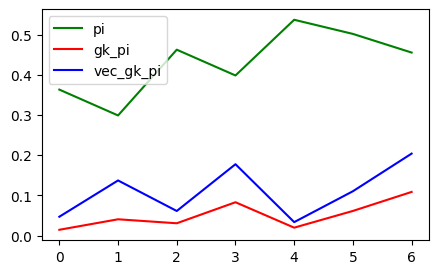

In [46]:
plt.figure(figsize=(5, 3))
plt.plot(pis, label="pi", color="g")
plt.plot(gk_pis, label="gk_pi", color="r")
plt.plot(vec_gk_pis, label="vec_gk_pi", color="b")
plt.legend(loc='upper left')
plt.show()